In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
# import joblib
# import shap

In [191]:
# Load the dataset
df = pd.read_csv('Kag_happiness_indicators.csv')

# Initial inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nData statistics:")
print(df.describe())


Dataset shape: (17137, 34)

First 5 rows:
   Unnamed: 0  year          workstat  prestige divorce widowed  educ  \
0           1  1994     keeping house      46.0     NaN     iap  12.0   
1           2  1994  working fulltime      22.0      no     iap  12.0   
2           3  1994  working fulltime      29.0      no     iap  12.0   
3           4  1994  working fulltime      42.0     yes     iap   8.0   
4           5  1994  working parttime      36.0     NaN     NaN  13.0   

             reg16  babies  preteen  ...  occattend regattend y94 y96 y98 y00  \
0  middle atlantic     2.0      3.0  ...        1.0       0.0   1   0   0   0   
1          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
2          foreign     0.0      0.0  ...        0.0       1.0   1   0   0   0   
3          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
4  middle atlantic     0.0      1.0  ...        0.0       0.0   1   0   0   0   

   y02  y04  y06  unem10  
0    

In [192]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0         0
year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [193]:
# Convert happiness to binary (1 for happy, 0 for not happy)
df['happy_binary'] = df['happy'].apply(lambda x: 1 if x in ['very happy', 'pretty happy'] else 0)

Text(0, 0.5, '')

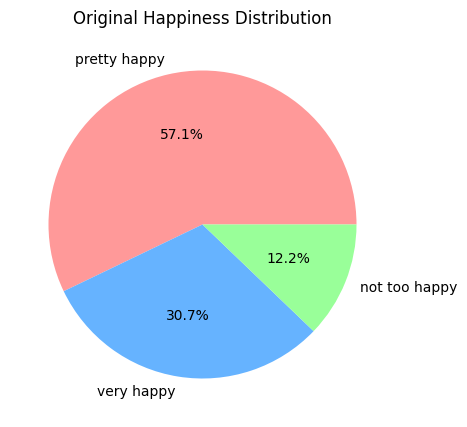

In [194]:
# Enhanced target visualization
plt.figure(figsize=(18, 5))

# Pie chart
plt.subplot(1, 3, 1)
df['happy'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Original Happiness Distribution')
plt.ylabel('')

C:\Users\HP\AppData\Local\Temp\ipykernel_21876\2205040489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='happy_binary', data=df, palette='Set2')


([<matplotlib.axis.XTick at 0x29e6911d950>,
 [Text(0, 0, 'Not Happy'), Text(1, 0, 'Happy')])

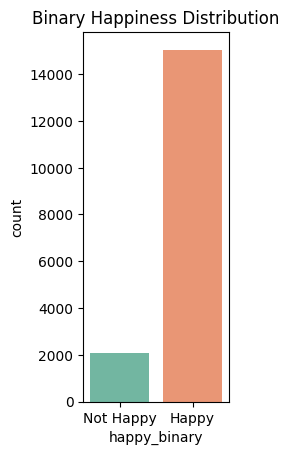

In [195]:
# Bar plot of binary happiness
plt.subplot(1, 3, 2)
sns.countplot(x='happy_binary', data=df, palette='Set2')
plt.title('Binary Happiness Distribution')
plt.xticks([0, 1], ['Not Happy', 'Happy'])

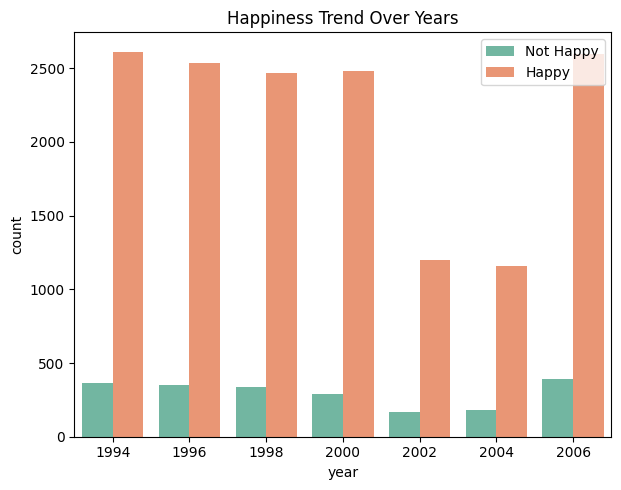

In [196]:
# Happiness by year (if multiple years exist)
plt.figure(figsize=(18, 5))
if 'year' in df.columns:
    plt.subplot(1, 3, 3)
    sns.countplot(x='year', hue='happy_binary', data=df, palette='Set2')
    plt.title('Happiness Trend Over Years')
    plt.legend(['Not Happy', 'Happy'])

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 1000x500 with 0 Axes>

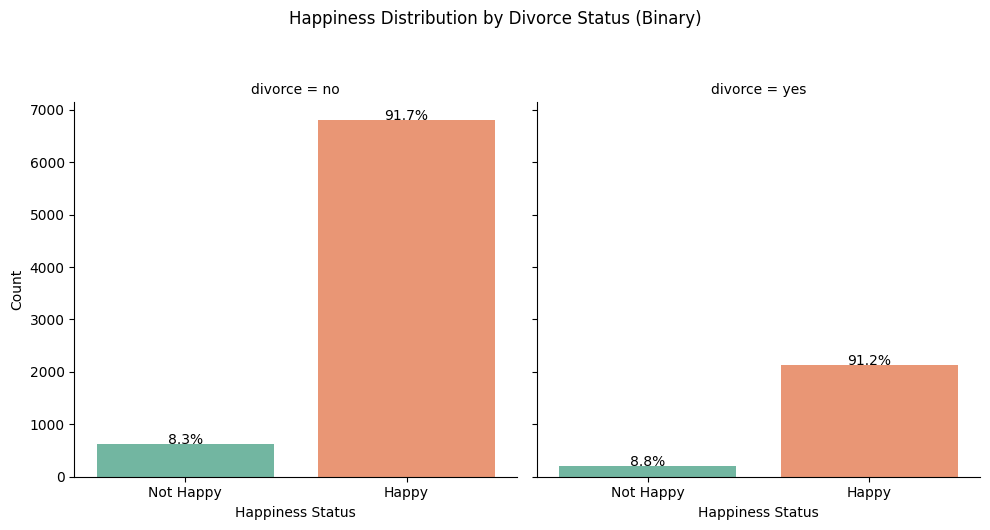

In [197]:
# Create the FacetGrid with binary happiness
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(df, col='divorce', height=5, aspect=1)
g.map(sns.countplot, 'happy_binary', palette='Set2', order=[0, 1])

# Customize labels and titles
g.set_xticklabels(['Not Happy', 'Happy'])  # Map 0/1 to meaningful labels
g.set_xlabels('Happiness Status')
g.set_ylabels('Count')
g.fig.suptitle('Happiness Distribution by Divorce Status (Binary)', y=1.05)

# Add percentage annotations
for ax in g.axes.flat:
    total = len(df[df['divorce'] == ax.get_title().split('=')[1].strip()])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 5,
                f'{height/total:.1%}',
                ha='center')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21876\2917353048.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='happy_binary', data=df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_21876\2917353048.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='viridis')


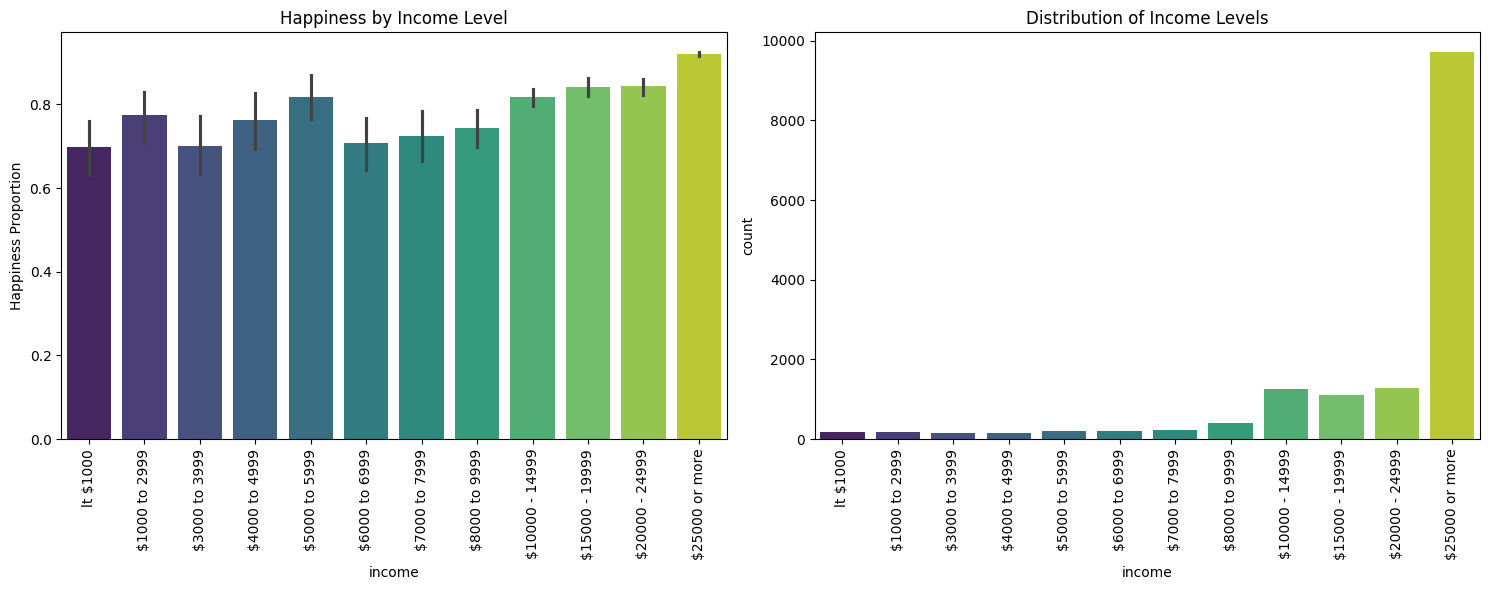

In [198]:
if 'income' in df.columns:
    # Order income categories logically
    income_order = ['lt $1000', '$1000 to 2999', '$3000 to 3999', '$4000 to 4999',
                   '$5000 to 5999', '$6000 to 6999', '$7000 to 7999', '$8000 to 9999',
                   '$10000 - 14999', '$15000 - 19999', '$20000 - 24999', '$25000 or more']
    
    # Convert to categorical with order
    df['income'] = pd.Categorical(df['income'], categories=income_order, ordered=True)
    
    # Plot
    plt.figure(figsize=(15, 6))
    
    # Happiness proportion by income
    plt.subplot(1, 2, 1)
    sns.barplot(x='income', y='happy_binary', data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Happiness by Income Level')
    plt.ylabel('Happiness Proportion')
    
    # Count of each income category
    plt.subplot(1, 2, 2)
    sns.countplot(x='income', data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Distribution of Income Levels')
    
    plt.tight_layout()
    plt.show()

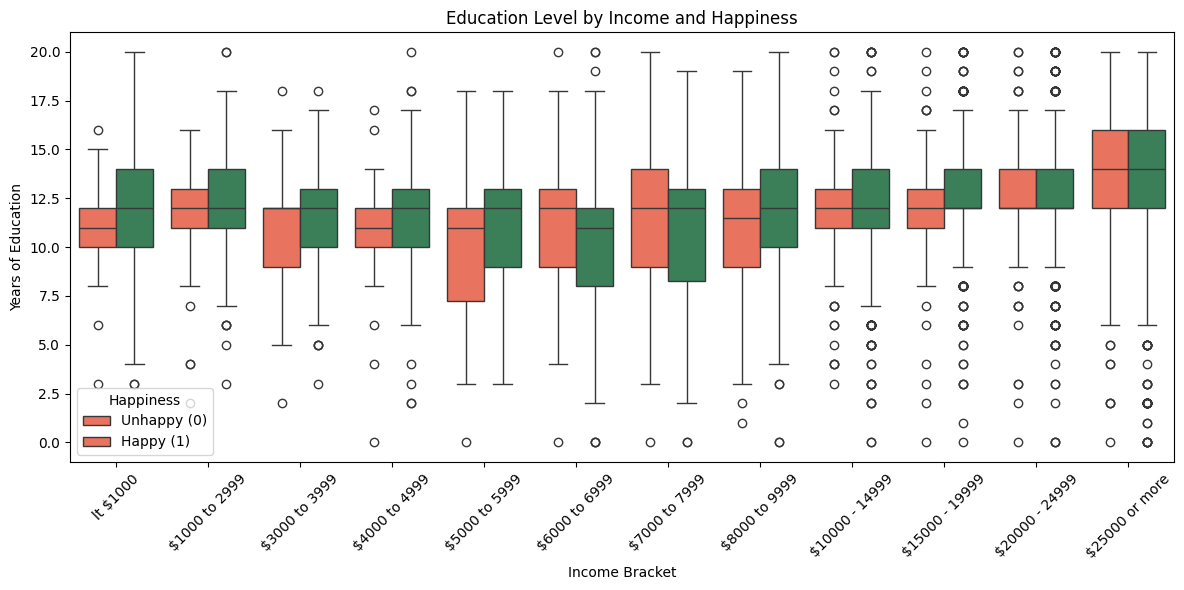

In [199]:
# Happiness by education and income (example)
df['happy_binary'] = df['happy_binary'].astype(int)
palette = {0: 'tomato', 1: 'seagreen'}

if 'educ' in df.columns and 'income' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='income', y='educ', hue='happy_binary', data=df, palette={0: 'tomato', 1: 'seagreen'})
    plt.xticks(rotation=45)
    plt.title('Education Level by Income and Happiness')
    plt.xlabel("Income Bracket")  
    plt.ylabel("Years of Education")  
    plt.legend(title="Happiness", labels=["Unhappy (0)", "Happy (1)"])  
    plt.tight_layout()
    plt.show()




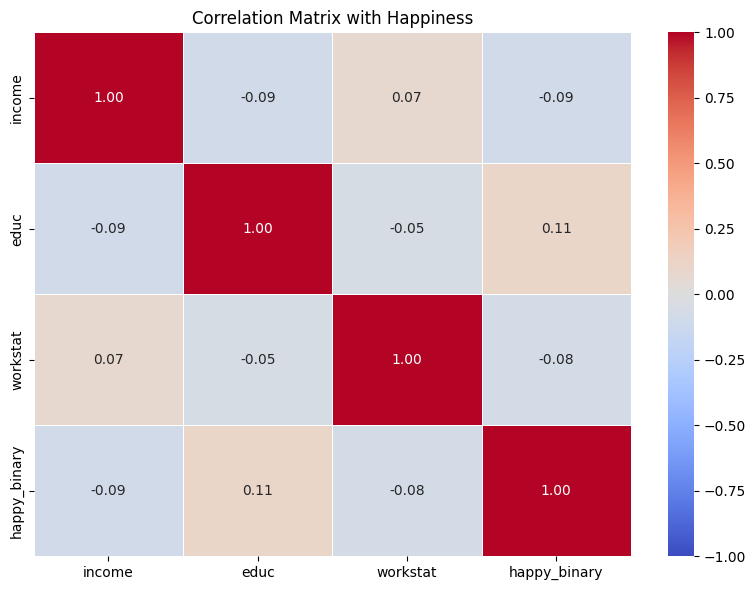

Correlation Matrix:
                income      educ  workstat  happy_binary
income        1.000000 -0.090170  0.071312     -0.086926
educ         -0.090170  1.000000 -0.054372      0.106745
workstat      0.071312 -0.054372  1.000000     -0.076911
happy_binary -0.086926  0.106745 -0.076911      1.000000


In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
df_corr = df.copy()

# Convert categorical variables to numeric codes
for col in ['income', 'workstat']:
    if col in df_corr.columns:
        # Use factorize instead of LabelEncoder to avoid creating a new encoder object
        df_corr[col] = pd.factorize(df_corr[col])[0]

# Ensure education is numeric (if it isn't already)
if 'educ' in df_corr.columns:
    df_corr['educ'] = pd.to_numeric(df_corr['educ'], errors='coerce')

# Make sure happiness is binary integer
df_corr['happy_binary'] = df_corr['happy_binary'].astype(int)

# Select relevant features
corr_features = ['income', 'educ', 'workstat', 'happy_binary']

# Compute correlation matrix
corr_matrix = df_corr[corr_features].corr()

# Create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            vmin=-1, 
            vmax=1,
            mask=None,  # Set to mask if you want to hide upper triangle
            linewidths=.5)
plt.title('Correlation Matrix with Happiness')
plt.tight_layout()
plt.show()

# Print the correlation matrix for verification
print("Correlation Matrix:")
print(corr_matrix)

C:\Users\HP\AppData\Local\Temp\ipykernel_21876\4279922870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='happy_binary', y='educ', data=df, palette='coolwarm')


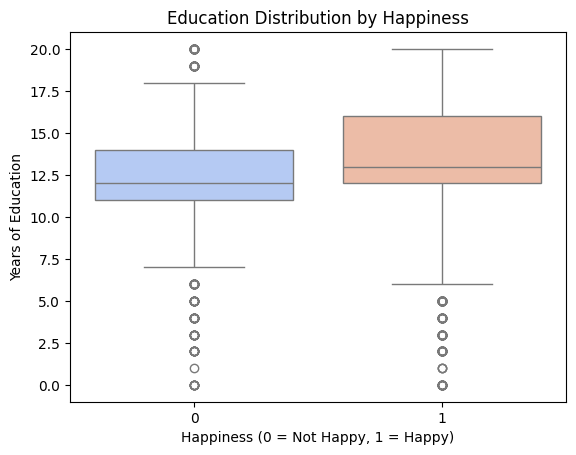

In [201]:
sns.boxplot(x='happy_binary', y='educ', data=df, palette='coolwarm')
plt.title('Education Distribution by Happiness')
plt.xlabel('Happiness (0 = Not Happy, 1 = Happy)')
plt.ylabel('Years of Education')
plt.show()


In [202]:
# Convert 'educ' and 'income' to numeric, forcing errors to NaN
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Check the data types again
print(df[['educ', 'income']].dtypes)


educ      float64
income    float64
dtype: object


In [203]:
# Categorical columns (check for rare/unexpected categories)
cat_cols = ['workstat', 'divorce', 'widowed', 'reg16', 'owngun']

# Numerical columns (check for statistical outliers)
num_cols = ['year', 'prestige', 'educ', 'babies', 'preteen', 'teens', 'tvhours']

# Special case (ordinal categorical that looks numerical)
special_col = ['income']  # We'll handle this separately

In [204]:
import pandas as pd
from category_encoders import TargetEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Let's define the categorical columns and target
target_col = 'income'

# Frequency analysis
frequency_results = {}

for col in cat_cols:
    # Get value counts
    counts = df[col].value_counts()
    
    # Identify rare categories (count < 5)
    rare_categories = counts[counts < 5]
    
    # Get rows containing rare categories
    rare_rows = df[df[col].isin(rare_categories.index)]
    
    # Store results
    frequency_results[col] = {
        'rare_categories': rare_categories.to_dict(),
        'rare_rows': rare_rows
    }

# Display frequency-based results
for col, results in frequency_results.items():
    print(f"\nColumn: {col}")
    print("Rare categories (count < 5):")
    for category, count in results['rare_categories'].items():
        print(f"  {category}: {count} occurrences")
    
    print("\nSample rows with rare categories:")
    display(results['rare_rows'].head())


Column: workstat
Rare categories (count < 5):

Sample rows with rare categories:


,Unnamed: 0,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,happy_binary



Column: divorce
Rare categories (count < 5):

Sample rows with rare categories:


,Unnamed: 0,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,happy_binary



Column: widowed
Rare categories (count < 5):

Sample rows with rare categories:


,Unnamed: 0,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,happy_binary



Column: reg16
Rare categories (count < 5):

Sample rows with rare categories:


,Unnamed: 0,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,happy_binary



Column: owngun
Rare categories (count < 5):

Sample rows with rare categories:


,Unnamed: 0,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,happy_binary


In [205]:
# Separate features and target
X = df.drop(['happy', 'happy_binary'], axis=1)
y = df['happy_binary']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

cols_to_drop = ['region', 'y94', 'y96', 'y98', 'y00', 'y02', 'y04', 'y06',
                'attend', 'vhappy', 'mothfath16', 'black', 'gwbush04',
                'female', 'blackfemale', 'gwbush00', 'occattend', 'regattend']
X = X.drop(cols_to_drop, axis=1)


In [206]:
# Separate features and target
X = df.drop(['happy', 'happy_binary'], axis=1)
y = df['happy_binary']


categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class imbalance
print("Class distribution in training set:", y_train.value_counts(normalize=True))
print("Class distribution in test set:", y_test.value_counts(normalize=True))

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

Class distribution in training set: happy_binary
1    0.878255
0    0.121745
Name: proportion, dtype: float64
Class distribution in test set: happy_binary
1    0.878355
0    0.121645
Name: proportion, dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['income']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [207]:
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la cible (y)
X = df.drop(columns=['happy', 'happy_binary'])  # on enlève la cible et éventuellement la version texte
y = df['happy_binary']

# Division en jeu d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [208]:
# Suppression des colonnes non informatives
df.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)

# Gestion des valeurs manquantes
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna('missing', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21876\4115886635.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('missing', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21876\4115886635.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi